In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve

# Question 1

In [2]:
classes = {0:"not fraud", 1:"fraud"}

df = pd.read_csv("data/fraud_data.csv")

In [3]:
# agreggating counts by class
counts = df.groupby("Class").agg({"Amount":len})

# retrieving the value directly via at
not_frauds = counts.at[0,"Amount"]
frauds = counts.at[1,"Amount"]

resultq1 = not_frauds / (not_frauds + frauds)
resultq1

0.9835891762319642

In [4]:
## using standarized train test split as per test instructions

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Question 2

In [5]:
from sklearn.dummy import DummyClassifier

# instantiating and training dummy
dumclf = DummyClassifier(strategy="most_frequent")
dumclf.fit(X_train, y_train)

# obtaining relevant values
accuracy = accuracy_score(y_test, dumclf.predict(X_test))
recall = recall_score(y_test, dumclf.predict(X_test))

# QUESTION 3

In [6]:
# instantiating and training classifier
clf = SVC()
clf.fit(X_train, y_train)

# obtaining relevant values
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))

print(accuracy, recall, precision)

0.9900442477876106 0.35 0.9333333333333333


# QUESTION 4

In [7]:
# instantiating and training classifier
clf2 = SVC(C=1e9, gamma=1e-07)
clf2.fit(X_train, y_train)

SVC(C=1000000000.0, gamma=1e-07)

In [8]:
y_predicted = clf2.decision_function(X_test) > -220

matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[5320,   24],
       [  14,   66]], dtype=int64)

# QUESTION 5

In [9]:
# re-scaling mandatory for log regression
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

LogisticRegression()

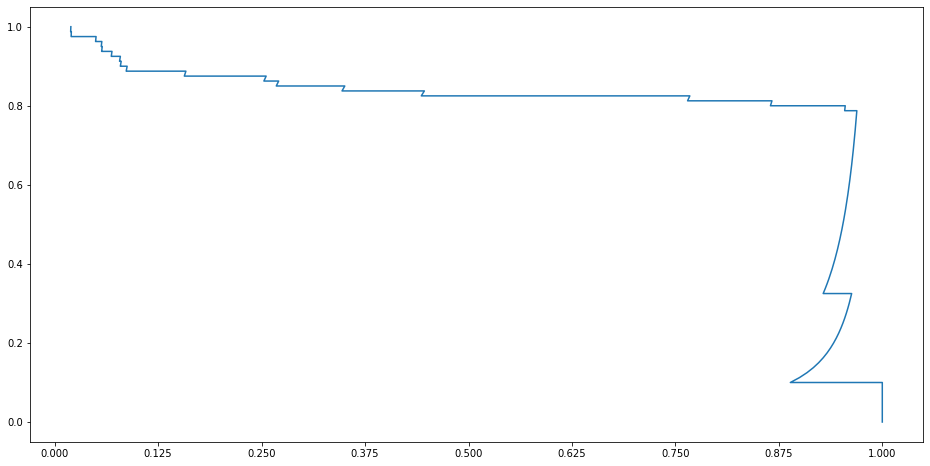

In [10]:
predict_prob = logreg.decision_function(X_test_norm)

precision, recall, thresholds = precision_recall_curve(y_test, predict_prob)

plt.figure(figsize=(16,8))
plt.plot(precision, recall)
plt.xticks(list(np.linspace(0,1,num=9)));

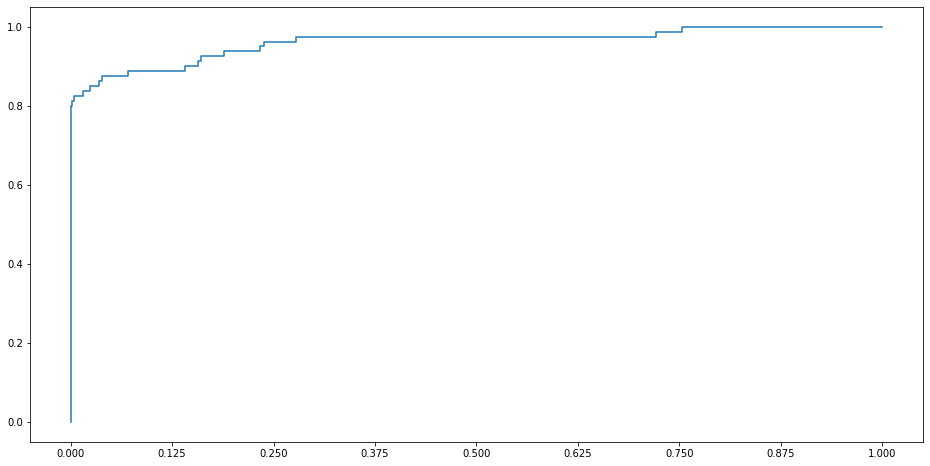

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, predict_prob)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr)
plt.xticks(list(np.linspace(0,1,num=9)));

# QUESTION 6

In [19]:
params = {"penalty":["l1", "l2"], "C":[0.01, 0.1, 1, 10, 100]}

clflogreg = LogisticRegression(solver="liblinear")

grid = GridSearchCV(clflogreg, param_grid=params, cv=3, scoring="recall")
grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [23]:
results = grid.cv_results_
results["mean_test_score"]
results["params"]

[{'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l2'},
 {'C': 0.1, 'penalty': 'l1'},
 {'C': 0.1, 'penalty': 'l2'},
 {'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 10, 'penalty': 'l1'},
 {'C': 10, 'penalty': 'l2'},
 {'C': 100, 'penalty': 'l1'},
 {'C': 100, 'penalty': 'l2'}]

In [36]:
results = results["mean_test_score"].reshape(5,2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [38]:
results.shape

(5, 2)